Load libraries and data.

In [18]:
import keras
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

(60000, 28, 28)

View sample of images.

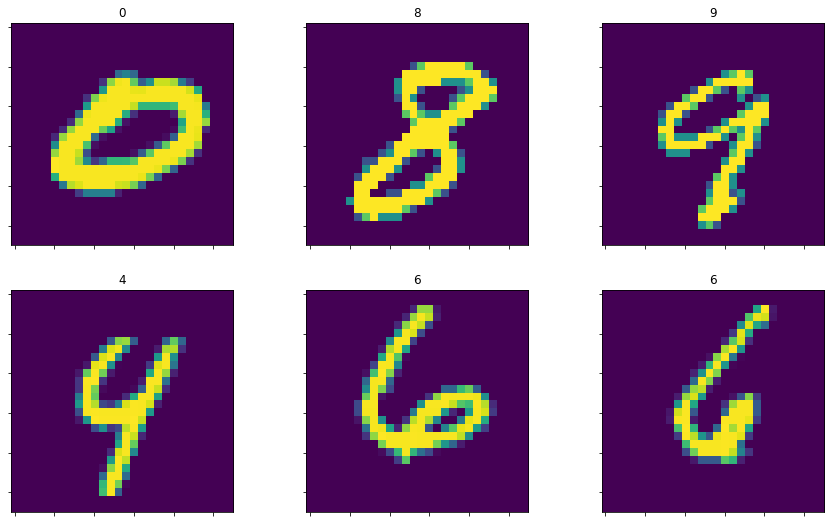

In [31]:
plt.figure(figsize=(15,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tick_params(labelbottom=False)
  plt.tick_params(labelleft=False)
  idx = random.randint(0, len(train_images))
  plt.title(train_labels[idx])
  plt.imshow(train_images[idx])

Build model.

In [13]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Flatten images and normalize pixel values between 0 and 1.

In [16]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

In [33]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Convert labels to categorical variables using one-hot encoding.

In [19]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train model.

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2570 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0369 - accuracy: 0.9888


Evaluate model.

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9766


0.9765999913215637

View predictions and images.

In [25]:
predictions = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


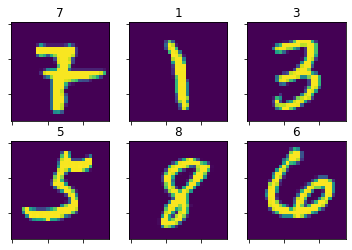

In [34]:
for i in range(6):
  plt.subplot(2,3,i+1)
  idx = random.randint(0, len(test_images))
  plt.tick_params(labelbottom=False)
  plt.tick_params(labelleft=False)
  plt.title(predictions[idx])
  plt.imshow(test_images[idx].reshape(28,28))